<a href="https://colab.research.google.com/github/dipasreepoddar/fastbook/blob/master/exercises/full_mnist_further_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 18.2MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 194kB 23.1MB/s 
     |████████████████████████████████| 1.2MB 56.4MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 12.8MB 219kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [4]:
(path/'training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/6')]

In [5]:
(path/'training'/'0').ls().sorted()

(#5923) [Path('/root/.fastai/data/mnist_png/training/0/1.png'),Path('/root/.fastai/data/mnist_png/training/0/1000.png'),Path('/root/.fastai/data/mnist_png/training/0/10005.png'),Path('/root/.fastai/data/mnist_png/training/0/10010.png'),Path('/root/.fastai/data/mnist_png/training/0/10022.png'),Path('/root/.fastai/data/mnist_png/training/0/10025.png'),Path('/root/.fastai/data/mnist_png/training/0/10026.png'),Path('/root/.fastai/data/mnist_png/training/0/10045.png'),Path('/root/.fastai/data/mnist_png/training/0/10069.png'),Path('/root/.fastai/data/mnist_png/training/0/10071.png')...]

In [6]:
digits = range(10)

def loadData(dType, digit):
  '''
  load data of a given type (training/testing) for a given digit
  '''
  data = (path/dType/str(digit)).ls().sorted()
  digit_tensors = [tensor(Image.open(o)) for o in data]
  stacked_digits = torch.stack(digit_tensors).float()/255
  return stacked_digits

trainData = {}
validData = {}
for i in digits:
  trainData[i] = loadData('training', i)
  validData[i] = loadData('testing', i)

In [16]:
# display first image of 8 in training data

df = pd.DataFrame(tensor((trainData[8][0]*255).int()))
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,213,195,3,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,211,252,246,54,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,211,252,252,174,0,18,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,213,252,252,197,24,72,209,47,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,253,246,117,24,44,235,252,155,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,84,250,250,106,0,72,207,252,252,155,0,0,0,0,0


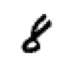

In [29]:
show_image(tensor((trainData[8][0]*255).int()));

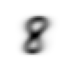

In [32]:
def getMeanDigit(digit): return trainData[digit].mean(0)

def showMeanDigit(digit):
  '''
  Show mean image for a given digit
  '''
  meanDigit = getMeanDigit(digit)
  show_image(meanDigit);

showMeanDigit(8)

In [ ]:

# F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()